<a href="https://www.kaggle.com/code/vashudevtyagi/regression-algorithm-on-sklearn-dataset-iris?scriptVersionId=201617207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np 
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score


In [2]:
df=pd.read_csv("/kaggle/input/iris-dataset/IRIS.csv")

In [3]:
df.shape

(150, 5)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.isnull()
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

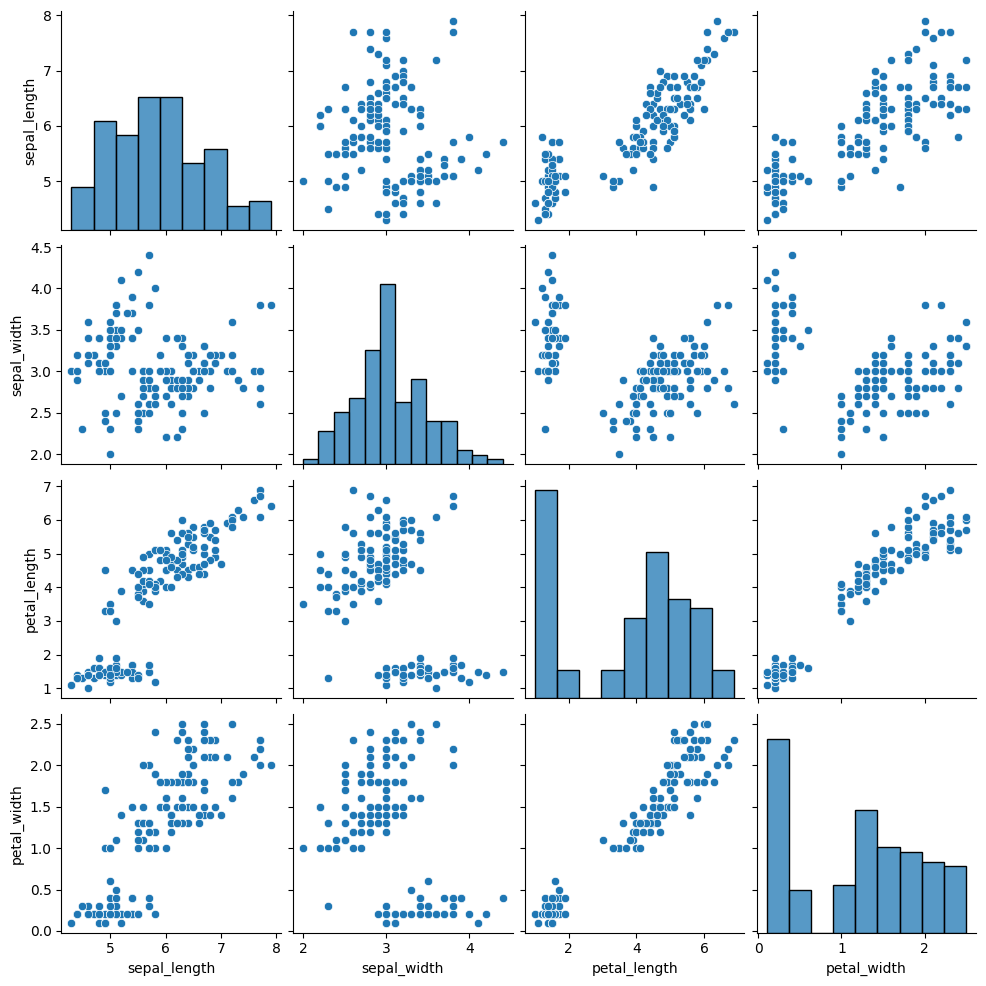

In [9]:
sns.pairplot(df)

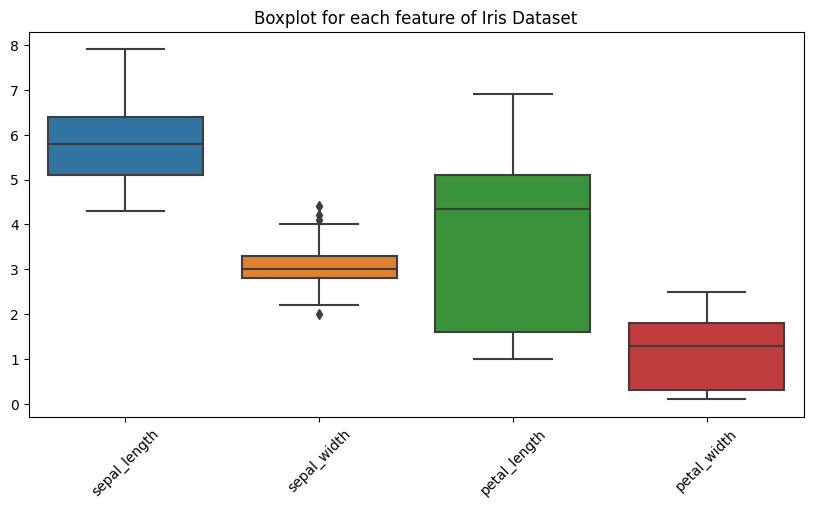

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.title('Boxplot for each feature of Iris Dataset')
plt.xticks(rotation=45)
plt.show()

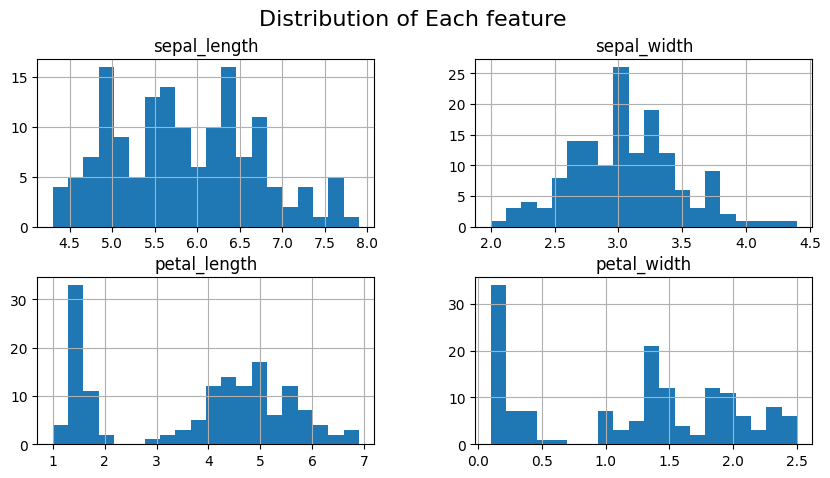

In [11]:
df.hist(figsize=(10,5),bins=20)
plt.suptitle('Distribution of Each feature',fontsize=16)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


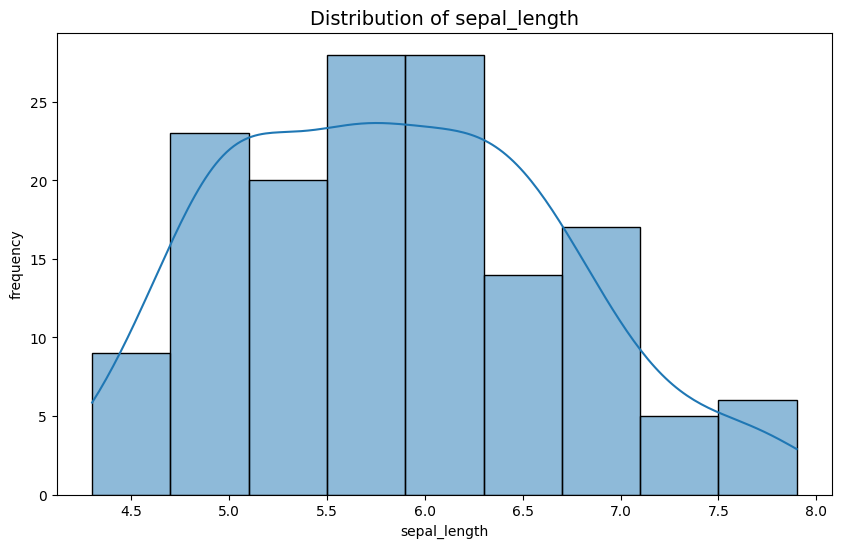

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


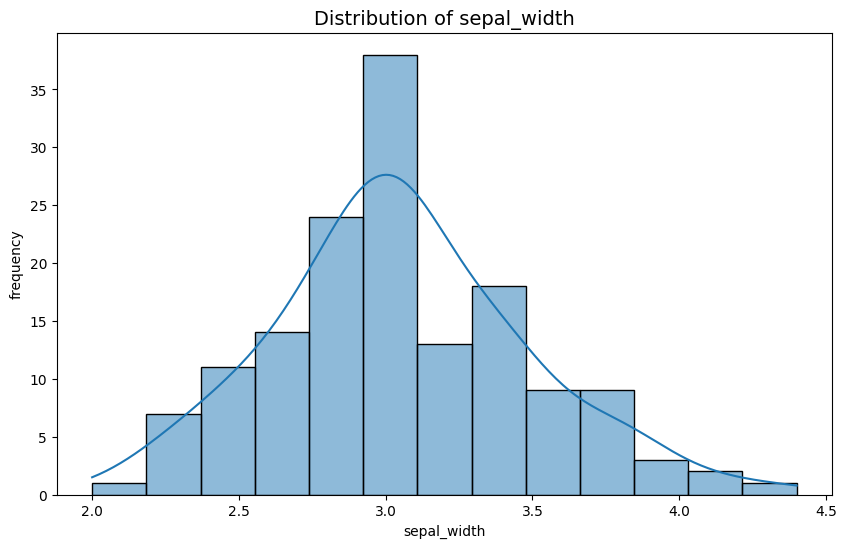

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


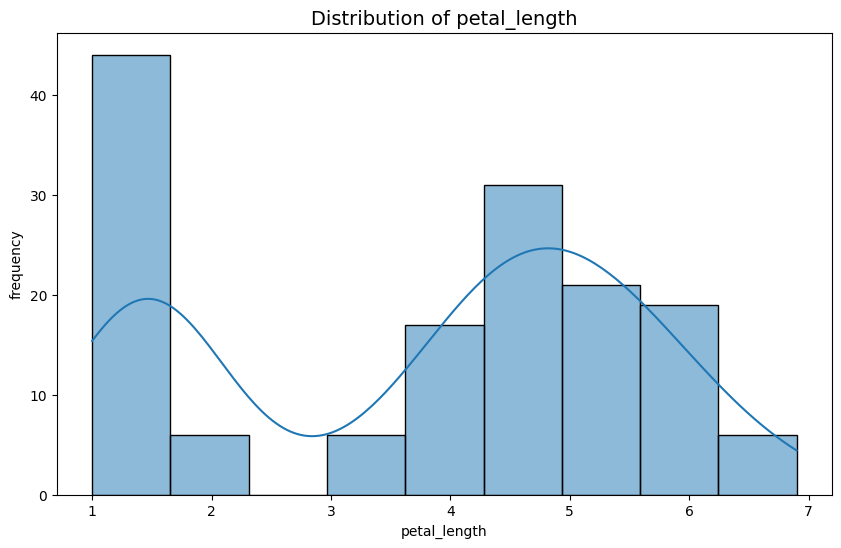

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


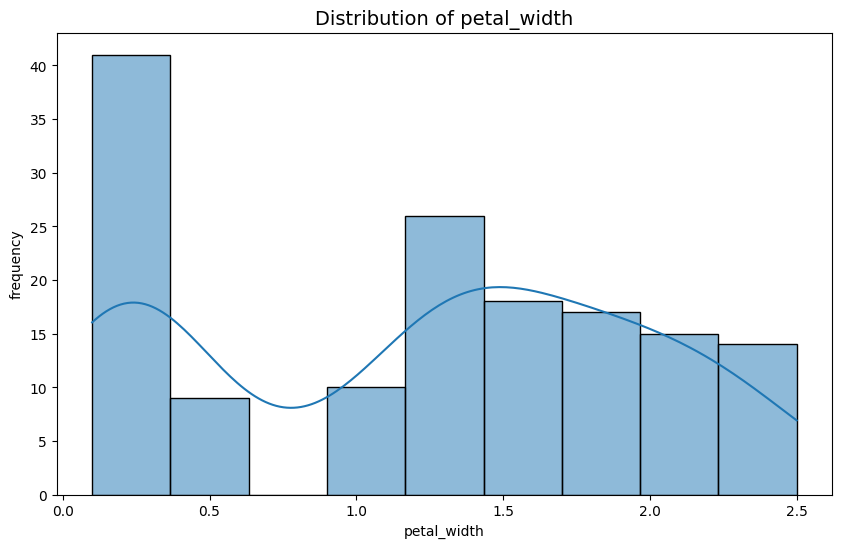

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


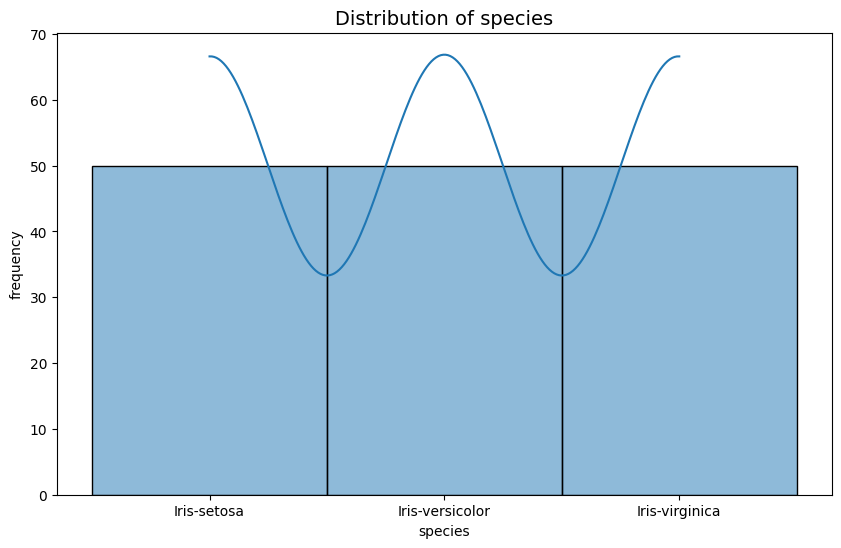

In [12]:
for column in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column],kde=True)
    plt.title(f'Distribution of {column}',fontsize=14)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()

In [13]:
print(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
tc=df.corr()

In [16]:
tc

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

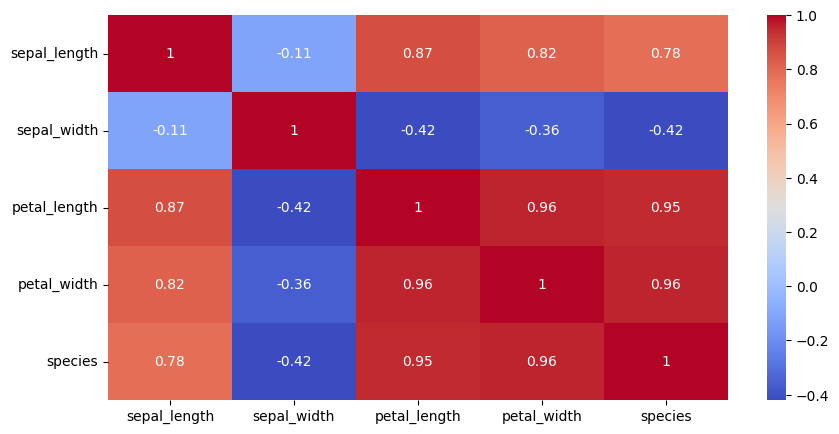

In [17]:
plt.figure(figsize=(10,5))
tc=df.corr().round(2)
sns.heatmap(tc,annot=True,cmap='coolwarm')


In [18]:
x=df.drop('species',axis=1)
y=df['species']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [21]:
from sklearn import metrics
model=LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the logistic regression is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the logistic regression is: 0.9736842105263158


In [22]:
print("Train Shape",x_train.shape)
print("Test Shape",x_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


In [23]:
model.score(x_train,y_train)*100

97.32142857142857

In [24]:
model.score(x_test,y_test)*100

97.36842105263158

In [25]:
print("Coefficients",model.coef_)
print("Intercept:",model.intercept_)

Coefficients [[-1.02109827  1.04251016 -1.7790278  -1.66102155]
 [ 0.54183308 -0.35994548 -0.26906514 -0.7168076 ]
 [ 0.47926519 -0.68256468  2.04809293  2.37782915]]
Intercept: [-0.42098126  1.77047957 -1.34949831]


In [26]:
y_pred=model.predict(x_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [27]:
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MAE):",mse)
print("Root Mean Squared Error(RMSE):",rmse)

Mean Absolute Error(MAE): 0.02631578947368421
Mean Squared Error(MAE): 0.02631578947368421
Root Mean Squared Error(RMSE): 0.16222142113076254


In [28]:
R2_score=model.score(x,y)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [29]:
R2_score

0.3333333333333333

In [30]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)
print('The accuracy of the SVC is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVC is: 0.9736842105263158


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)


Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Class0','Class1','Class2']))


              precision    recall  f1-score   support

      Class0       1.00      1.00      1.00        13
      Class1       1.00      0.94      0.97        16
      Class2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

